Імпортую бібліотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

Прив'язую гугл диск до роботи

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Вказую шлях до файлу та зчитую дані

In [ ]:
filename = "/content/drive/My Drive/KPI/ML/ML2/ave_hi_nyc_jan_1895-2018.csv"
df = pd.read_csv(filename)

Переглядаю ключову інформацію

In [ ]:
df.head()

,Date,Value,Anomaly
0,189501,28.9,-2.6
1,189601,27.7,-3.8
2,189701,28.5,-3.0
3,189801,33.1,1.6
4,189901,29.1,-2.4


In [ ]:
df.tail()

,Date,Value,Anomaly
119,201401,28.7,-2.8
120,201501,30.0,-1.5
121,201601,34.5,3.0
122,201701,38.1,6.6
123,201801,31.8,0.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


Перейменовую стовпець 'Value' в 'Temperature'

In [ ]:
df.columns = ['Date', 'Temperature', 'Anomaly']

In [ ]:
df.head(3)

,Date,Temperature,Anomaly
0,189501,28.9,-2.6
1,189601,27.7,-3.8
2,189701,28.5,-3.0


Прибираю значення "01" з кінця усіх дат

In [ ]:
df.Date = df.Date.floordiv(100)
df.head(3)

,Date,Temperature,Anomaly
0,1895,28.9,-2.6
1,1896,27.7,-3.8
2,1897,28.5,-3.0


Знаходжу основні статистичні показники

In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df.Temperature.describe()

count    124.00
mean      31.49
std        4.50
min       20.70
25%       28.70
50%       31.15
75%       34.50
max       42.20
Name: Temperature, dtype: float64

Будую графік значень температури за 1895-2018 роки

<Axes: xlabel='Date'>

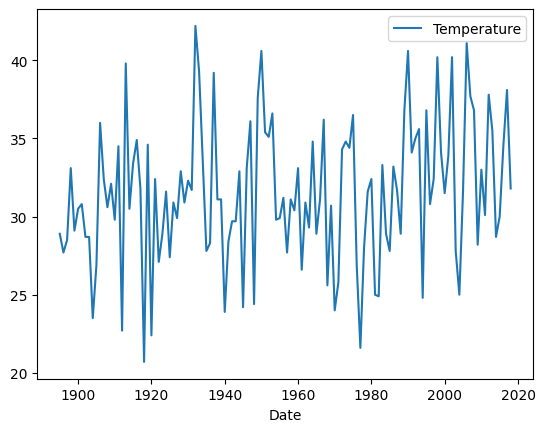

In [ ]:
df.plot(x='Date', y='Temperature')

Прогнозую дані на 2019-2023 та 1890-1894 роки

In [ ]:
linear_regression = stats.linregress(x = df.Date, y = df.Temperature)

In [ ]:
for i in range(2019, 2024):
  print(f'Predicted temperature for {i}:', linear_regression.slope*i + linear_regression.intercept)

print('\n')

for i in range(1890, 1895):
  print(f'Predicted temperature for {i}:', linear_regression.slope*i + linear_regression.intercept)

Predicted temperature for 2019: 33.105743509048
Predicted temperature for 2020: 33.131603147128246
Predicted temperature for 2021: 33.157462785208494
Predicted temperature for 2022: 33.18332242328874
Predicted temperature for 2023: 33.20918206136899


Predicted temperature for 1890: 29.76985019669551
Predicted temperature for 1891: 29.79570983477576
Predicted temperature for 1892: 29.821569472856016
Predicted temperature for 1893: 29.847429110936265
Predicted temperature for 1894: 29.87328874901652


Будую діаграму розкиду даних і пегресійну пряму, виконую масштабування осі y

(10.0, 70.0)

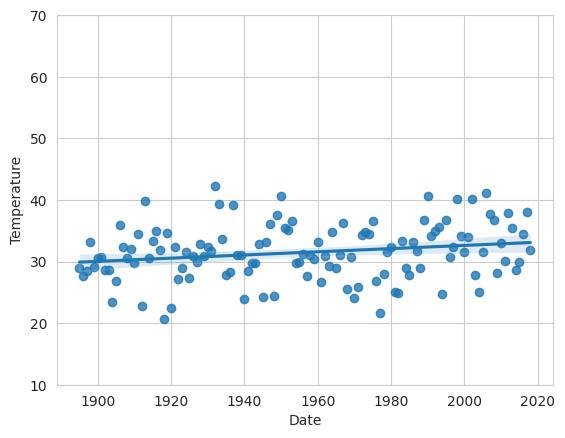

In [ ]:
sns.set_style('whitegrid')
axes = sns.regplot(x=df.Date, y=df.Temperature)
axes.set_ylim(10, 70)

Порівнюю прогноз та реальні значення

In [ ]:
filename2 = "/content/drive/My Drive/KPI/ML/ML2/2019-2023.csv"
df2 = pd.read_csv(filename2)
df2.Date = df2.Date.floordiv(100)

In [ ]:
for i in range(2019, 2024):
  print(f'Forecast for {i}:', linear_regression.slope*i + linear_regression.intercept)
  print(f'Real data for {i}:', df2[df2['Date'] == i]['Value'].iloc[0])

Forecast for 2019: 33.105743509048
Real data for 2019: 32.6
Forecast for 2020: 33.131603147128246
Real data for 2020: 39.2
Forecast for 2021: 33.157462785208494
Real data for 2021: 34.8
Forecast for 2022: 33.18332242328874
Real data for 2022: 30.4
Forecast for 2023: 33.20918206136899
Real data for 2023: 43.5
